# Used Cars Dataset
## Vehicles listings from Craigslist.org


dataset was found through kaggle 

webite: https://www.kaggle.com/austinreese/craigslist-carstrucks-data

### Description

### Context
Craigslist is the world's largest collection of used vehicles for sale. This dataset  includes every used vehicle entry within the United States on Craigslist.

### Content

This data is scraped every few months, it contains most all relevant information that Craigslist provides on car sales including columns like price, condition, manufacturer, latitude/longitude, and 18 other categories.

#### DATA
Last updated on 2020-12-03

Date created on 2018-10-10

data file is 1.34 GB containing 458,213 observations and 26 dimensions

In [1]:
# Importing libraries for the entire noteboook
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import matplotlib.image as mpimg
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
import matplotlib.cm
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn
from scipy import stats
from scipy.stats import norm, skew

In [2]:
df=pd.read_csv('data/vehicles.csv', index_col=0) #importing data set

### Exploratory Data Analysis (EDA) & Data Cleaning

In [3]:
df.head(5)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,7240372487,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,...,rwd,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,7240309422,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,7500,2014.0,hyundai,sonata,excellent,4 cylinders,...,fwd,NaN,sedan,NaN,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,7240224296,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,4900,2006.0,bmw,x3 3.0i,good,6 cylinders,...,NaN,NaN,SUV,blue,https://images.craigslist.org/00B0B_5zgEGWPOrt...,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,7240103965,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,https://auburn.craigslist.org,2000,1974.0,chevrolet,c-10,good,4 cylinders,...,rwd,full-size,pickup,blue,https://images.craigslist.org/00M0M_6o7KcDpArw...,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,7239983776,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,...,4wd,full-size,pickup,blue,https://images.craigslist.org/00p0p_b95l1EgUfl...,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600


In [4]:
df.shape
print(f"The shape of vehicle dataset: {df.shape}")

The shape of vehicle dataset: (458213, 25)


In [5]:
df.describe()

,id,price,year,odometer,lat,long
count,4.582130e+05,4.582130e+05,457163.000000,4.029100e+05,450765.000000,450765.000000
mean,7.235233e+09,4.042093e+04,2010.746067,1.016698e+05,38.531925,-94.375824
std,4.594362e+06,8.194599e+06,8.868136,3.228623e+06,5.857378,18.076225
min,7.208550e+09,0.000000e+00,1900.000000,0.000000e+00,-82.607549,-164.091797
25%,7.231953e+09,4.900000e+03,2008.000000,4.087700e+04,34.600000,-110.890427
50%,7.236409e+09,1.099500e+04,2013.000000,8.764100e+04,39.244500,-88.314889
75%,7.239321e+09,2.149500e+04,2016.000000,1.340000e+05,42.484503,-81.015022
max,7.241019e+09,3.615215e+09,2021.000000,2.043756e+09,82.049255,150.898969


In [6]:
df.info()#checking info for data set 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458213 entries, 0 to 458212
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            458213 non-null  int64  
 1   url           458213 non-null  object 
 2   region        458213 non-null  object 
 3   region_url    458213 non-null  object 
 4   price         458213 non-null  int64  
 5   year          457163 non-null  float64
 6   manufacturer  439993 non-null  object 
 7   model         453367 non-null  object 
 8   condition     265273 non-null  object 
 9   cylinders     287073 non-null  object 
 10  fuel          454976 non-null  object 
 11  odometer      402910 non-null  float64
 12  title_status  455636 non-null  object 
 13  transmission  455771 non-null  object 
 14  VIN           270664 non-null  object 
 15  drive         324025 non-null  object 
 16  size          136865 non-null  object 
 17  type          345475 non-null  object 
 18  pain

In [7]:
df.select_dtypes('float64') #checking columns with float values

,year,odometer,lat,long
0,2010.0,32742.0,32.590000,-85.480000
1,2014.0,93600.0,32.547500,-85.468200
2,2006.0,87046.0,32.616807,-85.464149
3,1974.0,190000.0,32.861600,-85.216100
4,2005.0,116000.0,32.547500,-85.468200
...,...,...,...,...
458208,2014.0,83790.0,44.408867,-89.881210
458209,2018.0,31888.0,44.408867,-89.882240
458210,2014.0,53000.0,44.784900,-106.964800
458211,2008.0,164000.0,44.773500,-106.939600


### Dropping columns which could not be utilized for predicting

    i. ID: column are generic numbers which doesnt contribute to feature of a car
    ii. URL: is web address; for which all data has been scraped for this model and doesnt need to be utilzied from now onwards
    iii. region_url: is a webaddress and does not provide any relatoin with price determination of a vehicle
    iv. VIN number of car is used for identification, also to pull data in systems and data base; would not add value predicting price of a vehicle
    v. image_url: web address of image/s uploaded with the car address, at this point in time it is outside scope for my model of price prediction, could be used for future prediction to pull images from image_url which will be used through CNN for price prediction. 

In [8]:
df.drop(['id', 'url', 'region_url', 'VIN', 'image_url'], axis = 1, inplace = True)
df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,description,state,lat,long,posting_date
0,auburn,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,rwd,NaN,other,NaN,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,auburn,7500,2014.0,hyundai,sonata,excellent,4 cylinders,gas,93600.0,clean,automatic,fwd,NaN,sedan,NaN,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,auburn,4900,2006.0,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,clean,automatic,NaN,NaN,SUV,blue,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,auburn,2000,1974.0,chevrolet,c-10,good,4 cylinders,gas,190000.0,clean,automatic,rwd,full-size,pickup,blue,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,auburn,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,lien,automatic,4wd,full-size,pickup,blue,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600


<BarContainer object of 43 artists>

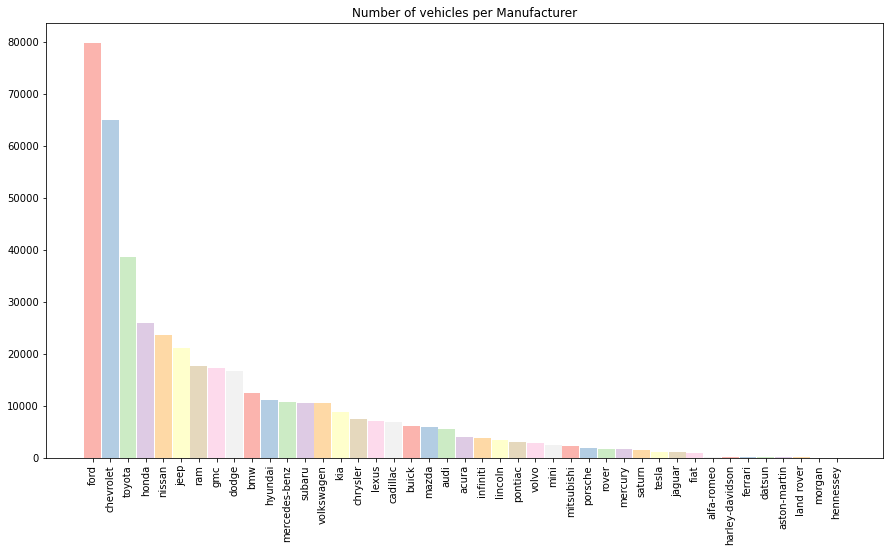

In [9]:
# Visualizing number of Vehicles per manufacturer
x = (df.groupby(['manufacturer'],as_index = False).count().sort_values('price', ascending = False))['manufacturer'].tolist()
y = (df.groupby(['manufacturer'],as_index = False).count().sort_values('price', ascending = False))['price'].tolist()
cmap = plt.cm.Pastel1                                                             #for colors reference https://matplotlib.org/gallery/color/colormap_reference.html
fig = plt.figure(figsize=(15,8))
plt.xticks(rotation = 90)
plt.title('Number of vehicles per Manufacturer')
plt.bar(x, y, width=0.95, color=(cmap(np.arange(len(df)) % cmap.N)))  

Eyeballing it can be observed 3 top selling manufacturer are seemingly leader of the pack and from top 4th seller the difference diminishes

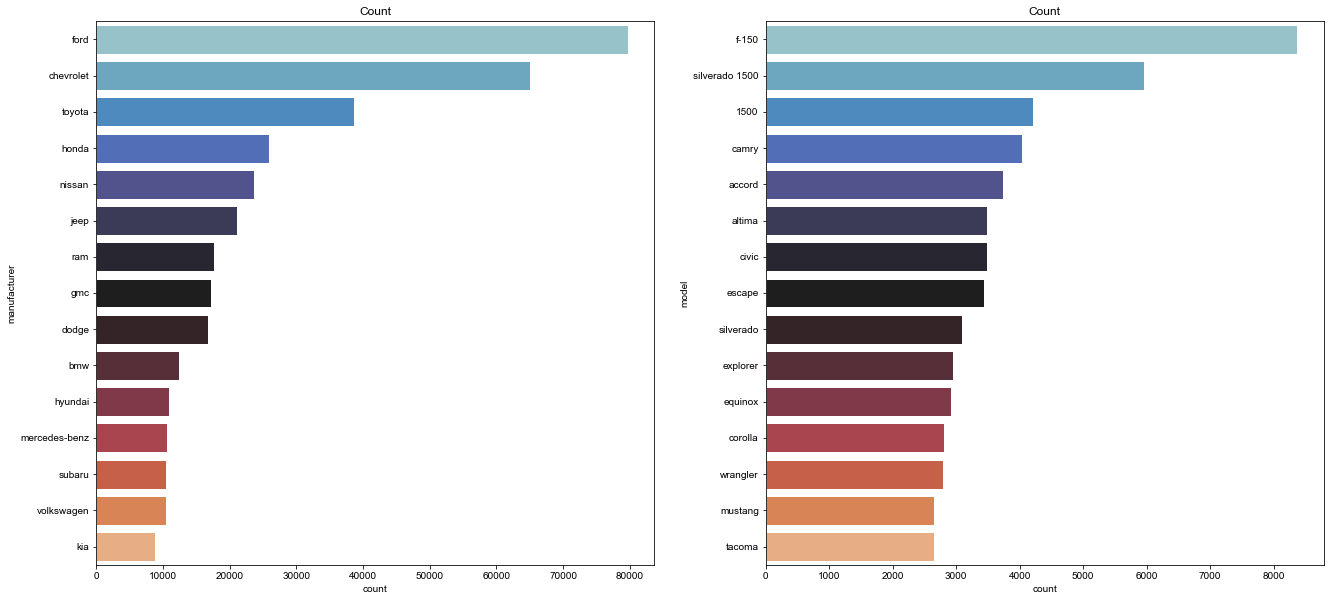

In [10]:
# Visualizing side by side top 10 manufacturers and top 10 models 
# for sns palette colors https://seaborn.pydata.org/tutorial/color_palettes.html?highlight=color
fig, ax =plt.subplots(1,2,figsize=(22, 10))
sns.set(rc={"axes.facecolor":"#fcfcfc", "axes.grid":False,'xtick.labelsize':15,'ytick.labelsize':15})
sns.countplot(y ='model',data = df,order=df.model.value_counts().iloc[:15].index, ax = ax[1],palette = "icefire").set_title('Count')
sns.countplot(y ='manufacturer',data = df,order=df.manufacturer.value_counts().iloc[:15].index, ax= ax[0],palette = "icefire").set_title('Count')
fig.show()

In [11]:
# Its observed that model list needs to be cleaned as Silverado is found twice in top 10
# First word is most important for 'model': many car model categories refer to the same model but are written differently 
# Also Cleaning car model values and reducing the number of categories
# Keeping only first word and remove spaces, special characters, uppercase letters, etc.
# Delete instances with a model that appears less than 200, which will reduce amount of categories by removing uncommon types


model_list = df['model'].tolist()
model_list = map(str, model_list)
model_list = [x.lower().strip() for x in model_list]
my_list = [car_model.split()[0] for car_model in model_list]
my_list = [x.replace(' ', '').replace('-', '').replace('/', '') for x in my_list]

df['car_model'] = my_list
df['car_model'] = df['manufacturer'] + " " + df['car_model']

new_car_models = (df.groupby(['car_model'], as_index= False).count())[['manufacturer', 'car_model', 'price']]
new_car_models = new_car_models.rename(columns={'price': 'count'})
only_common_models = new_car_models[new_car_models['count'] > 200]

print('Total vehicle models: ', len(new_car_models['count']))
print('Remaining vehicle models: ', len(only_common_models['count']))
print('Decreasing ', round((1-len(only_common_models['count'])/len(new_car_models['count'])) * 100, 2),'% of the number of vehicle models')
print()
print('Total instances: ', len(df['price']))
print('Remaining instances: ', sum(only_common_models['count']))
print('To be removing ', round((1-sum(only_common_models['count'])/len(df['price'])) * 100, 2),'% of the instances')

Total vehicle models:  3657
Remaining vehicle models:  293
Decreasing  91.99 % of the number of vehicle models

Total instances:  458213
Remaining instances:  397755
To be removing  13.19 % of the instances


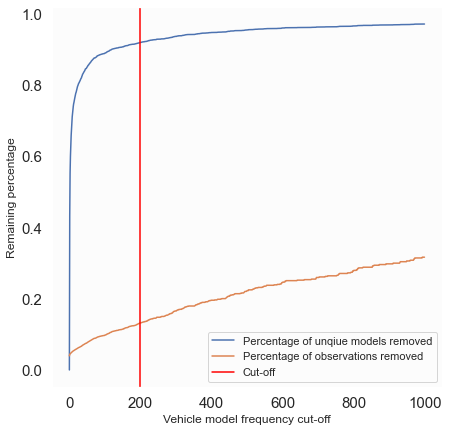

In [12]:
#200 seems like the reasonable choice w.r.t. trade-off reducing categories vs keeping enough data

removed_models_list = []
removed_instances_list = []

for i in range(0,1000):
    only_common_models_v2 = new_car_models[new_car_models['count']>i]
    models_removed = 1-len(only_common_models_v2['count'])/len(new_car_models['count'])
    instances_removed = 1-sum(only_common_models_v2['count'])/len(df['price'])
    
    removed_models_list.append(models_removed)
    removed_instances_list.append(instances_removed)

fig = plt.figure(figsize=(7,7))
plt.plot(removed_models_list, label = 'Percentage of unqiue models removed')
plt.plot(removed_instances_list, label = 'Percentage of observations removed')
plt.axvline(200 , color = 'red', label = 'Cut-off')
plt.ylabel('Remaining percentage')
plt.xlabel('Vehicle model frequency cut-off')
plt.legend()

In [13]:
#Imputing in original df

df = df[df['car_model'].isin(only_common_models['car_model'].tolist())]
df.drop('model', axis = 1, inplace = True)
df.shape

(397755, 20)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397755 entries, 0 to 458211
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        397755 non-null  object 
 1   price         397755 non-null  int64  
 2   year          397755 non-null  float64
 3   manufacturer  397755 non-null  object 
 4   condition     228203 non-null  object 
 5   cylinders     251124 non-null  object 
 6   fuel          395123 non-null  object 
 7   odometer      354181 non-null  float64
 8   title_status  395675 non-null  object 
 9   transmission  395727 non-null  object 
 10  drive         286955 non-null  object 
 11  size          116634 non-null  object 
 12  type          305071 non-null  object 
 13  paint_color   277659 non-null  object 
 14  description   397715 non-null  object 
 15  state         397755 non-null  object 
 16  lat           391314 non-null  float64
 17  long          391314 non-null  float64
 18  post

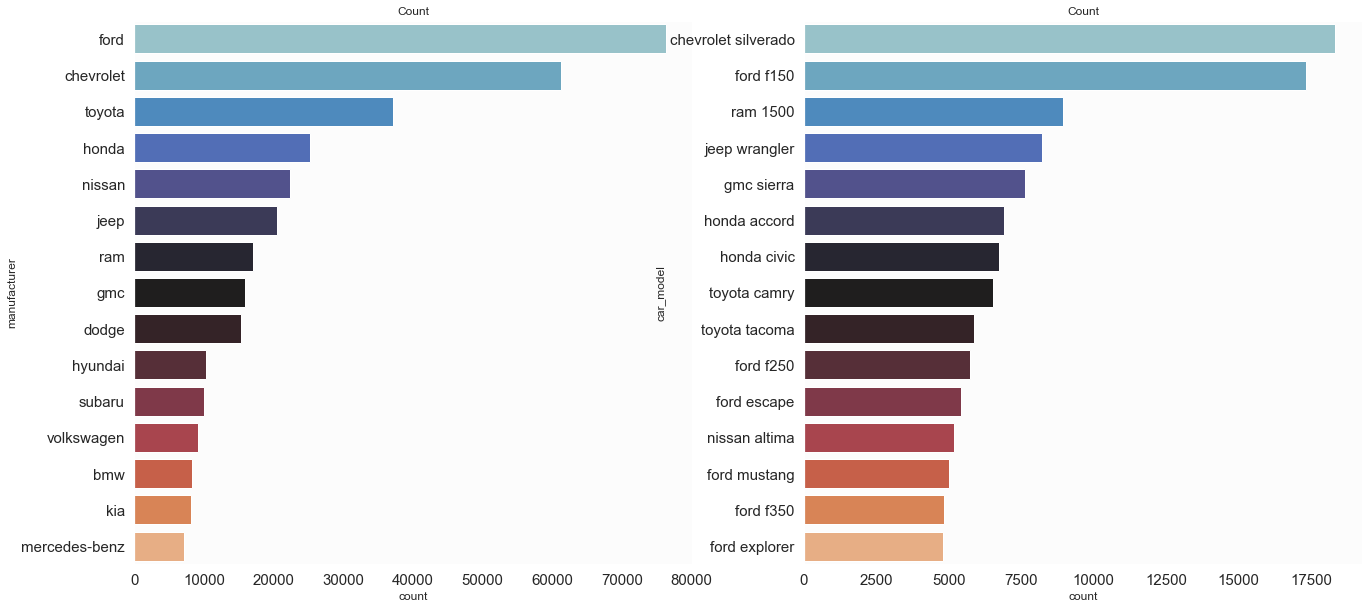

In [15]:
# Visualizing side by side top 10 manufacturers and top 10 models 
# for sns palette colors https://seaborn.pydata.org/tutorial/color_palettes.html?highlight=color
fig, ax =plt.subplots(1,2,figsize=(22, 10))
sns.set(rc={"axes.facecolor":"#fcfcfc", "axes.grid":False,'xtick.labelsize':15,'ytick.labelsize':15})
sns.countplot(y ='car_model',data = df,order=df.car_model.value_counts().iloc[:15].index, ax = ax[1],palette = "icefire").set_title('Count')
sns.countplot(y ='manufacturer',data = df,order=df.manufacturer.value_counts().iloc[:15].index, ax= ax[0],palette = "icefire").set_title('Count')
fig.show()

After cleaning data it is found that top although manufacturers have the same order but car models order changed


- Ford has five top selling models F-150 (Truck), F-250 (Truck), Escape (SUV), Ford Mustang, F-350 (Truck) and Explorer(SUV)
- Chevrolet has Silverado(Pickup) as there top seller leading the pack
- Toyota has Camry in top 10 models. Whereas, Honda also has two sedans Accord and Civic. And Nissan also has Altima which is also a sedan

It can be inferred that the market is led by American Manufactuers in truck and SUV category. Japanese car manufacturer have lead in sedans


In [16]:
df_ford = df[df['manufacturer'].str.contains("ford")]           #American 
df_chevrolet = df[df['manufacturer'].str.contains("chevrolet")] #American 
df_jeep = df[df['manufacturer'].str.contains("jeep")]           #American
df_ram = df[df['manufacturer'].str.contains("ram")]             #American
df_gmc = df[df['manufacturer'].str.contains("gmc")]             #American
df_dodge = df[df['manufacturer'].str.contains("dodge")]         #American

df_toyota = df[df['manufacturer'].str.contains("toyota")]       #Japanese 
df_honda = df[df['manufacturer'].str.contains("honda")]         #Japanese
df_nissan = df[df['manufacturer'].str.contains("nissan")]       #Japanese
df_mazda = df[df['manufacturer'].str.contains("mazda")]         #Japanese

df_hyundai = df[df['manufacturer'].str.contains("hyundai")]     #Korean
df_kia = df[df['manufacturer'].str.contains("kia")]             #Korean

df_volkswagen = df[df['manufacturer'].str.contains("volkswagen")] #German
df_bmw = df[df['manufacturer'].str.contains("bmw")]             #German
df_benz = df[df['manufacturer'].str.contains("benz")]           #German
df_audi = df[df['manufacturer'].str.contains("audi")]           #German

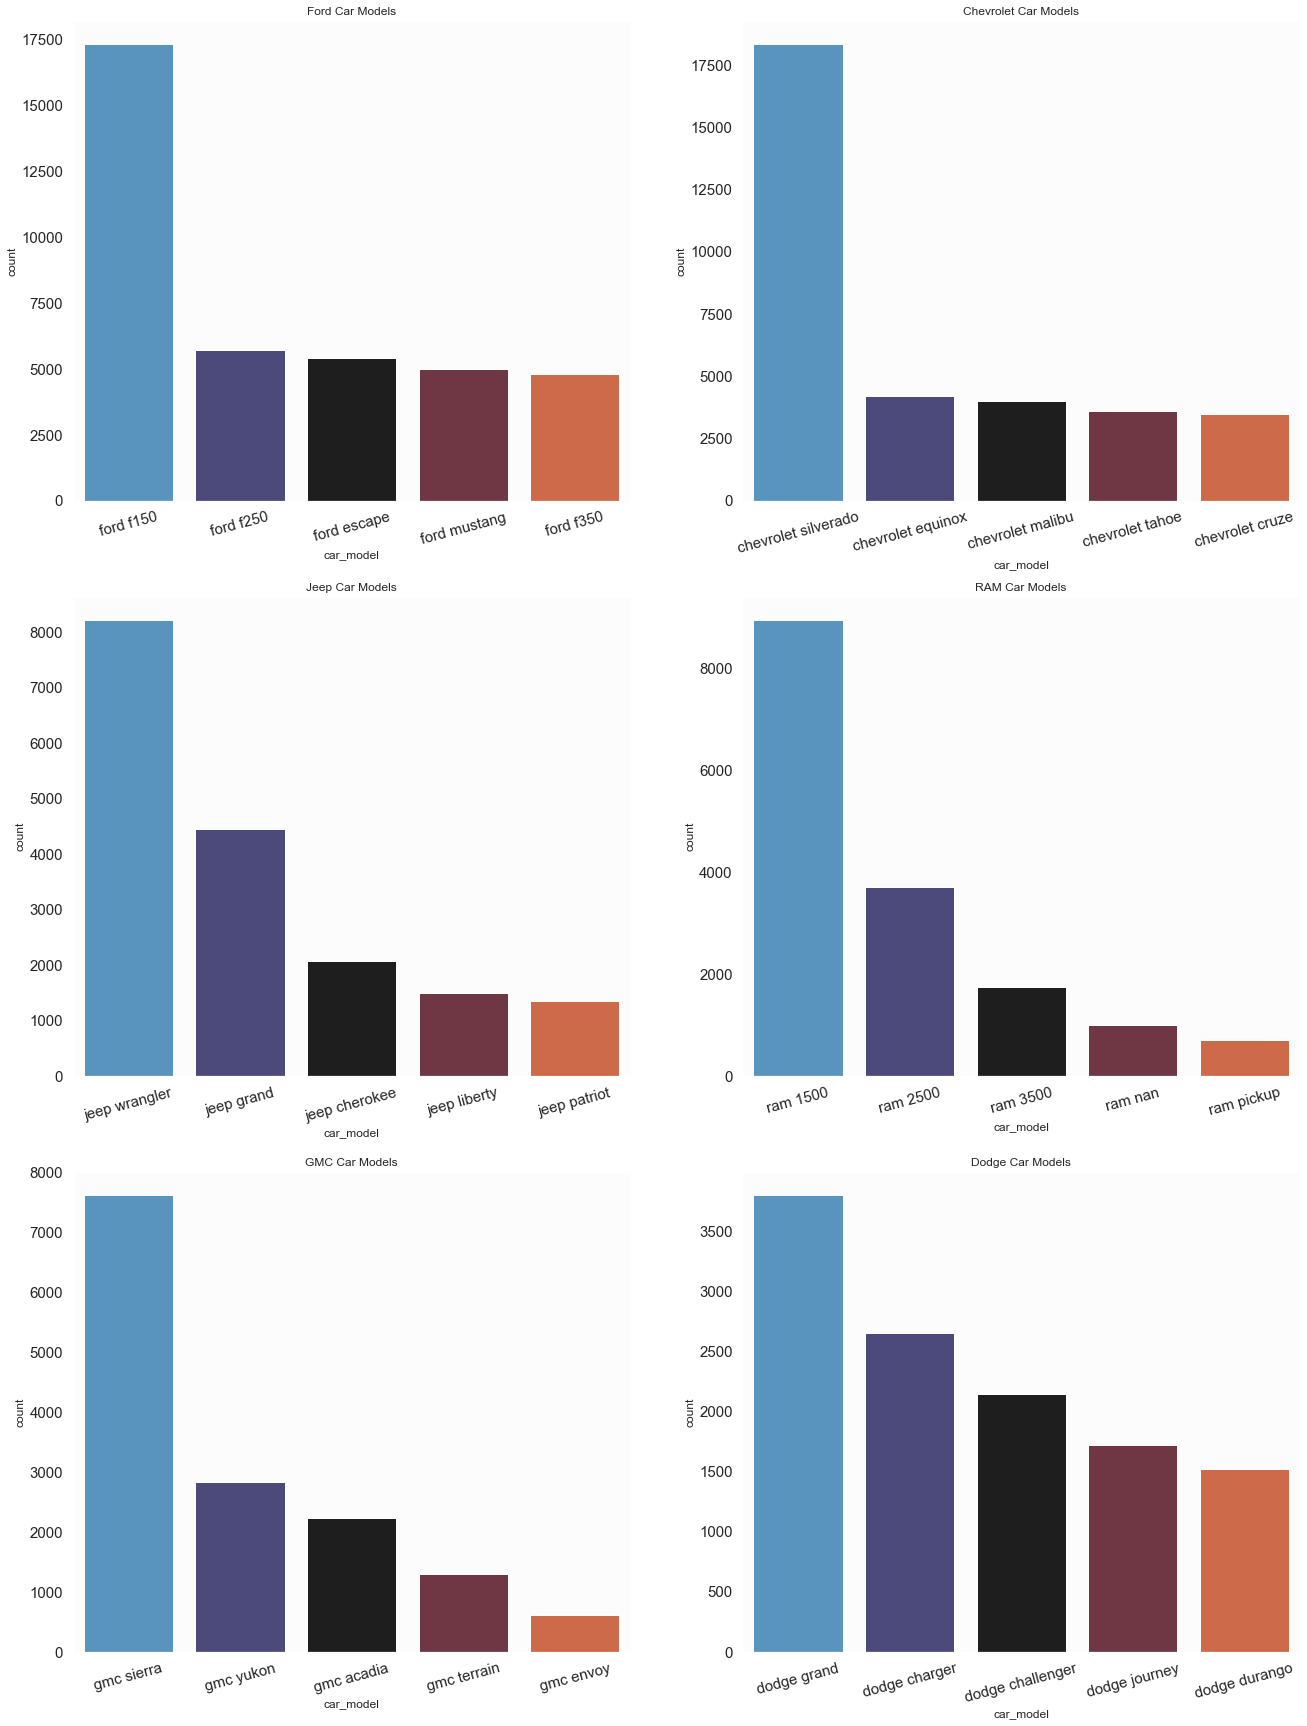

In [17]:
# Visualizing counts of top 5 car models for American manufacturer's (Ford, Chevrolet Jeep RAM GMC and Dodge)
fig, ax =plt.subplots(3,2,figsize=(22, 30))
sns.set(rc={"axes.facecolor":"#efefef", "axes.grid":False,'xtick.labelsize':12,'ytick.labelsize':12})
plt.xticks(ax[0,0].tick_params(axis='x', labelrotation=15))
sns.countplot(x ='car_model',data = df_ford,order=df_ford.car_model.value_counts().iloc[:5].index, ax = ax[0,0],palette="icefire").set_title('Ford Car Models')
plt.xticks(ax[0,1].tick_params(axis='x', labelrotation=15))
sns.countplot(x ='car_model',data = df_chevrolet,order=df_chevrolet.car_model.value_counts().iloc[:5].index, ax = ax[0,1],palette="icefire").set_title('Chevrolet Car Models')
plt.xticks(ax[1,0].tick_params(axis='x', labelrotation=15))
sns.countplot(x ='car_model',data = df_jeep,order=df_jeep.car_model.value_counts().iloc[:5].index, ax = ax[1,0],palette="icefire").set_title('Jeep Car Models')
plt.xticks(ax[1,1].tick_params(axis='x', labelrotation=15))
sns.countplot(x ='car_model',data = df_ram,order=df_ram.car_model.value_counts().iloc[:5].index, ax = ax[1,1],palette="icefire").set_title('RAM Car Models')
plt.xticks(ax[2,0].tick_params(axis='x', labelrotation=15))
sns.countplot(x ='car_model',data = df_gmc,order=df_gmc.car_model.value_counts().iloc[:5].index, ax = ax[2,0],palette="icefire").set_title('GMC Car Models')
plt.xticks(ax[2,1].tick_params(axis='x', labelrotation=15))
sns.countplot(x ='car_model',data = df_dodge,order=df_dodge.car_model.value_counts().iloc[:5].index, ax = ax[2,1],palette="icefire").set_title('Dodge Car Models')
fig.show()

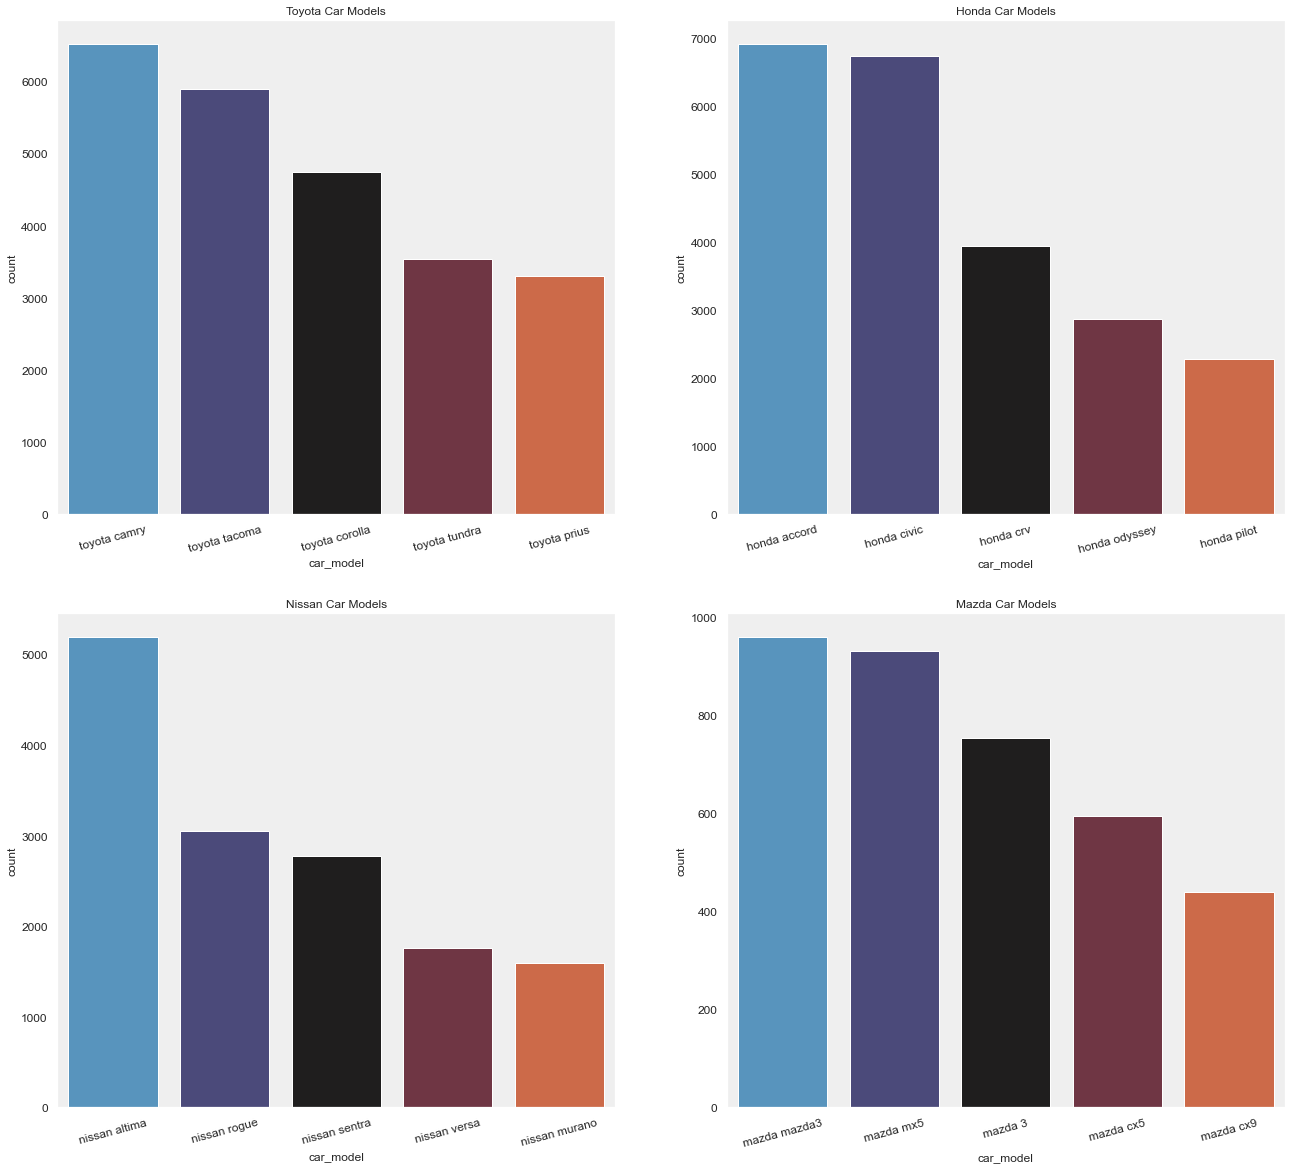

In [18]:
# Visualizing counts of top 5 car models for Japanese manufacturer's (Toyota, Honda Nissan and Mazda)
fig, ax =plt.subplots(2,2,figsize=(22, 20))
sns.set(rc={"axes.facecolor":"#efefef", "axes.grid":False,'xtick.labelsize':15,'ytick.labelsize':15})
plt.xticks(ax[0, 0].tick_params(axis='x', labelrotation=15))
sns.countplot(x ='car_model',data = df_toyota,order=df_toyota.car_model.value_counts().iloc[:5].index, ax = ax[0,0],palette="icefire").set_title('Toyota Car Models')
plt.xticks(ax[0, 1].tick_params(axis='x', labelrotation=15))
sns.countplot(x ='car_model',data = df_honda,order=df_honda.car_model.value_counts().iloc[:5].index, ax = ax[0,1],palette="icefire").set_title('Honda Car Models')
plt.xticks(ax[1,0].tick_params(axis='x', labelrotation=15))
sns.countplot(x ='car_model',data = df_nissan,order=df_nissan.car_model.value_counts().iloc[:5].index, ax = ax[1,0],palette="icefire").set_title('Nissan Car Models')
plt.xticks(ax[1,1].tick_params(axis='x', labelrotation=15))
sns.countplot(x ='car_model',data = df_mazda,order=df_mazda.car_model.value_counts().iloc[:5].index, ax = ax[1,1],palette="icefire").set_title('Mazda Car Models')

fig.show()

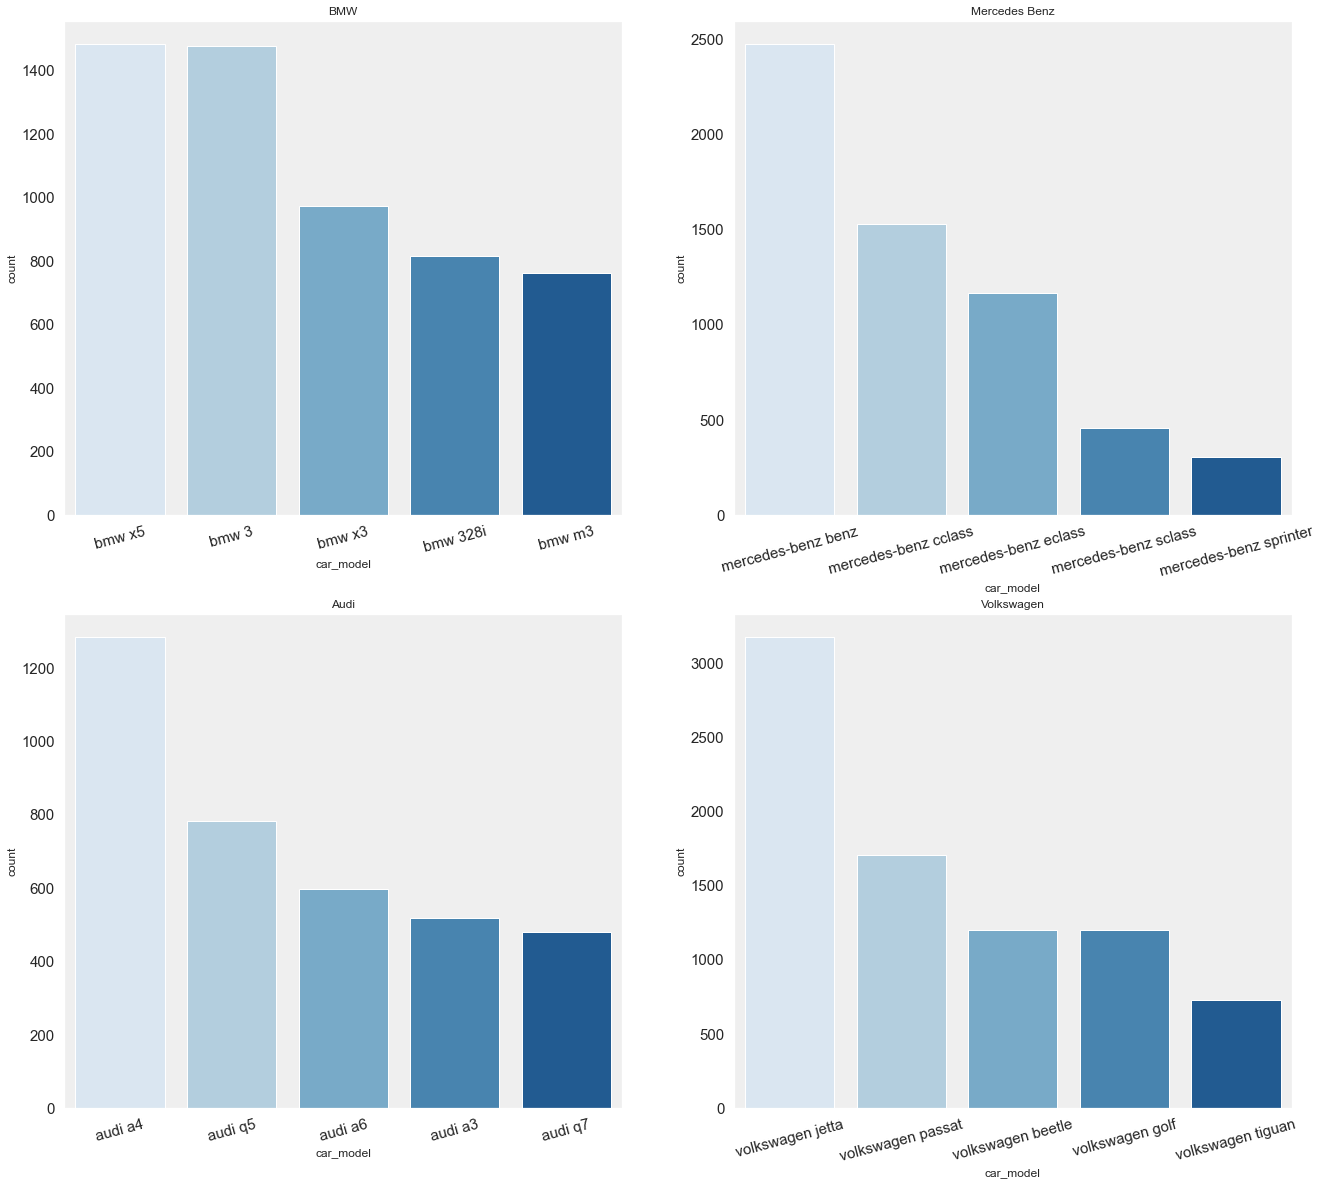

In [19]:
# Visualizing counts of top 5 car models for German manufacturer's (BMW, Mercedez Volkswagen and Audi)
fig, ax =plt.subplots(2,2,figsize=(22, 20))
sns.set(rc={"axes.facecolor":"#efefef", "axes.grid":False,'xtick.labelsize':15,'ytick.labelsize':15})
plt.xticks(ax[0,0].tick_params(axis='x', labelrotation=15))
sns.countplot(x ='car_model',data = df_bmw,order=df_bmw.car_model.value_counts().iloc[:5].index, ax = ax[0,0],palette="Blues").set_title('BMW')
plt.xticks(ax[0,1].tick_params(axis='x', labelrotation=15))
sns.countplot(x ='car_model',data = df_benz,order=df_benz.car_model.value_counts().iloc[:5].index, ax = ax[0,1],palette="Blues").set_title('Mercedes Benz')
plt.xticks(ax[1,0].tick_params(axis='x', labelrotation=15))
sns.countplot(x ='car_model',data = df_audi,order=df_audi.car_model.value_counts().iloc[:5].index, ax = ax[1,0],palette="Blues").set_title('Audi')
plt.xticks(ax[1,1].tick_params(axis='x', labelrotation=15))
sns.countplot(x ='car_model',data = df_volkswagen,order=df_volkswagen.car_model.value_counts().iloc[:5].index, ax = ax[1,1],palette="Blues").set_title('Volkswagen')
fig.show()

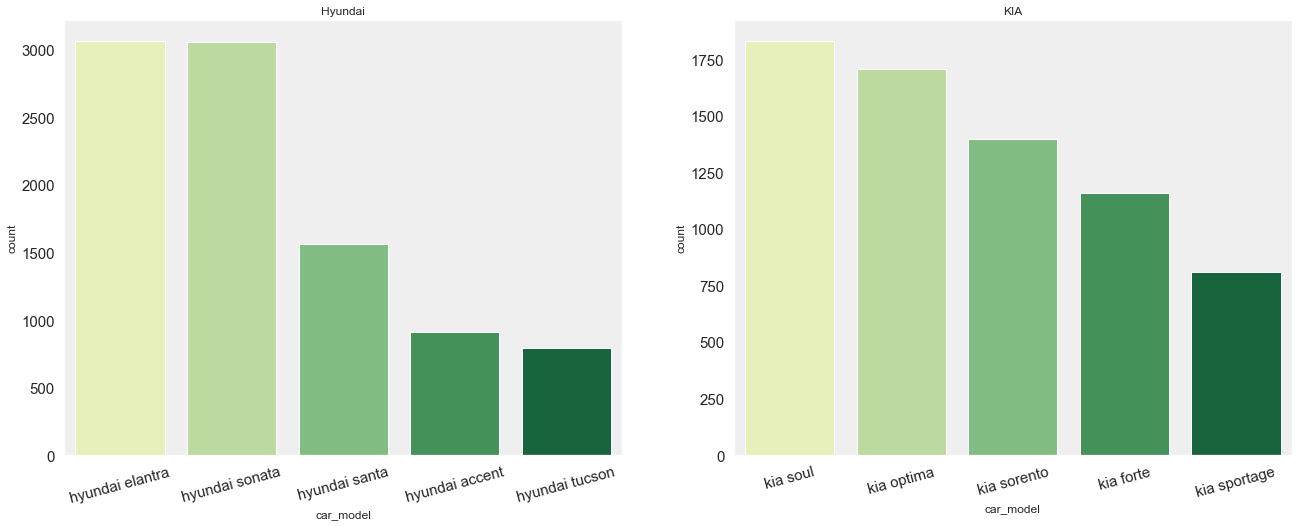

In [20]:
# Visualizing counts of top 5 car models for South Koreans manufacturer's (Hyundai & Kia)
fig, ax =plt.subplots(1,2,figsize=(22, 8))
sns.set(rc={"axes.facecolor":"#efefef", "axes.grid":False,'xtick.labelsize':12,'ytick.labelsize':12})
plt.xticks(ax[0].tick_params(axis='x', labelrotation=15))
plt.xticks(ax[1].tick_params(axis='x', labelrotation=15))
sns.countplot(x ='car_model',data = df_hyundai,order=df_hyundai.car_model.value_counts().iloc[:5].index, ax = ax[0],palette="YlGn").set_title('Hyundai')
sns.countplot(x ='car_model',data = df_kia,order=df_kia.car_model.value_counts().iloc[:5].index, ax = ax[1],palette="YlGn").set_title('KIA')
fig.show()

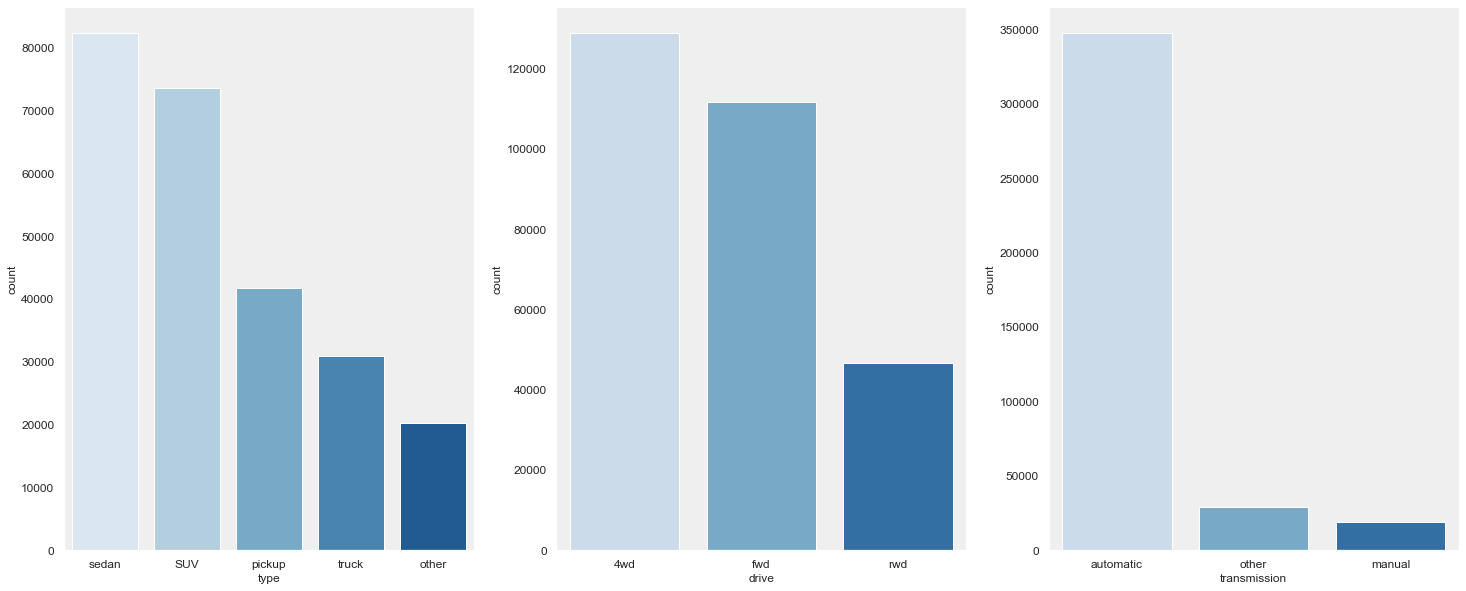

In [21]:
# Visualizing counts of top 5 types of vehicles, drivetrains and transmissions
fig, ax =plt.subplots(1,3,figsize=(25, 10))
sns.set(rc={"axes.facecolor":"#efefef", "axes.grid":False,'xtick.labelsize':20,'ytick.labelsize':20})
sns.countplot(x ='type',data = df,order=df.type.value_counts().iloc[:5].index, ax = ax[0],palette="Blues")
sns.countplot(x ='drive',data = df,order=df.drive.value_counts().iloc[:5].index, ax = ax[1],palette="Blues")
sns.countplot(x ='transmission',data = df,order=df.transmission.value_counts().iloc[:5].index, ax = ax[2],palette="Blues")
fig.show()

Type of cars: Sedans and SUVs are top 1 and 2

4WD is the leader but FWD is second

Automatic transmissions lead the pack

In [22]:
# Visualizing Vehicle advertisements through folium heat map
# folium quickstart guide can be found at: https://python-visualization.github.io/folium/quickstart.html
import folium
from folium.plugins import HeatMap

vehicles=df[df["type"]=="bus"]
vehicles.lat.fillna(0, inplace = True)
vehicles.long.fillna(0, inplace = True) 
vehicles = vehicles[['lat', 'long']]

vehiclemap=folium.Map(location=[40,-95],zoom_start=5)
HeatMap(data=vehicles, radius=16).add_to(vehiclemap)
vehiclemap


It can be observed that East coast have higher number of used vehicles ads/sales and specifically NY

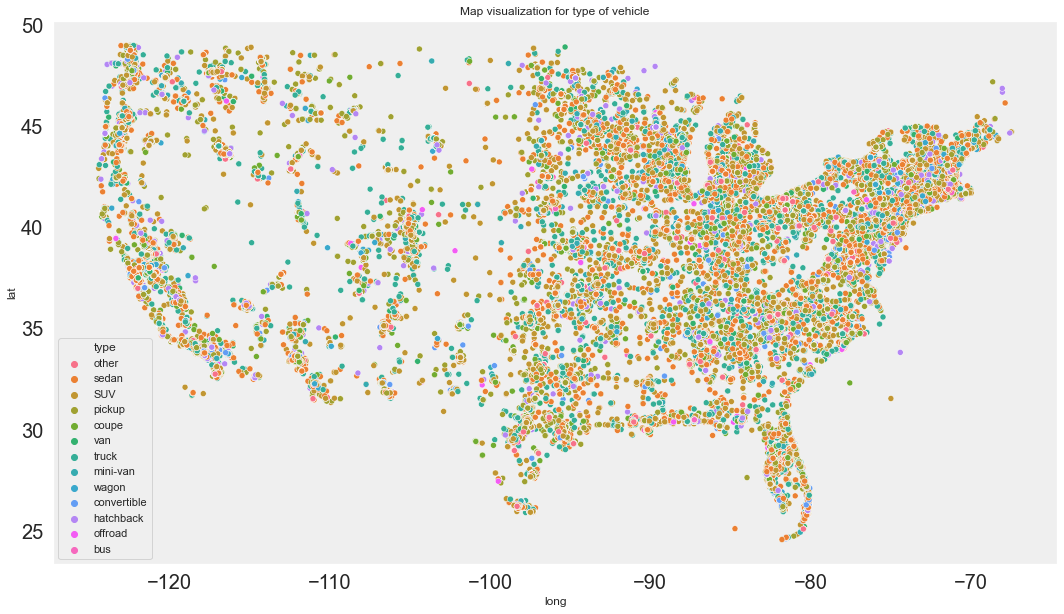

In [23]:
#Visuslize map using lat and lon
df_year = df[(df["year"]>1980) & (df["year"]<2021)].copy()
df_local = df_year[(df_year['lat']>24) & (df_year['lat']<50) & (df_year['long']>-125) & (df_year['long']<-65)]
plt.figure(figsize=(18,10))
plt.title('Map visualization for type of vehicle')
sns.scatterplot(data=df_local, x="long",y="lat",hue='type', palette="husl")
plt.show()

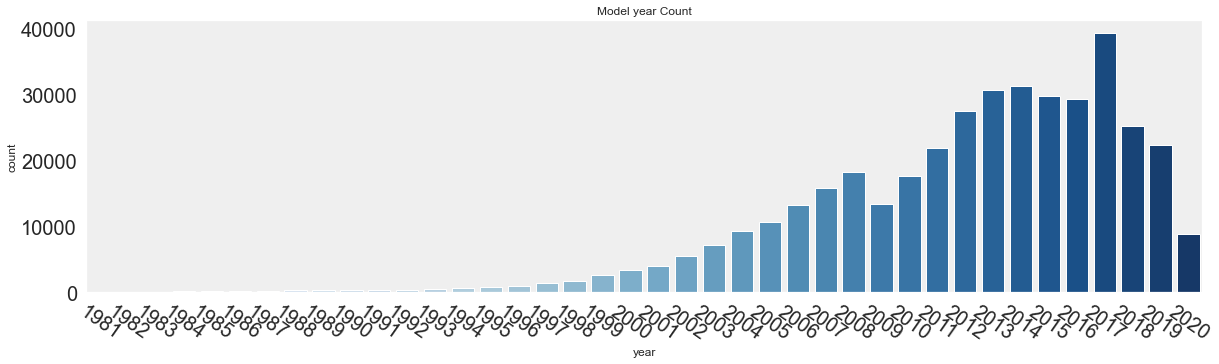

In [24]:
# Comparison of Vehicle model years

df_year = df[(df["year"]>1980) & (df["year"]<2021)].copy() # initiating from 1980 model yaer
df_year["year"] = df_year["year"].astype(int)
plt.figure(figsize=(20,5))
plt.xticks(rotation= -35)
sns.countplot(data= df_year,x="year",palette="Blues").set_title('Model year Count')
plt.show()

Data set is of used cars (secondary market) and hence drop in recent years is evident as new cars are sold in secondary market after a couple of years

In [25]:
# dropping car models prior to 2000 from our dataset
df = df[df['year'] > 2000]
df.shape

(380831, 20)

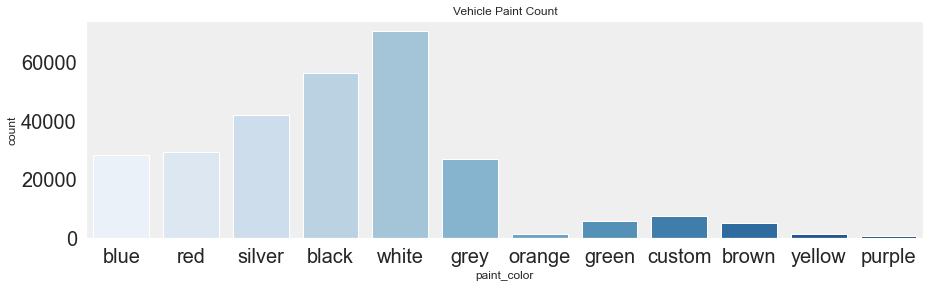

In [26]:
#Best Color and, condition's by color and type
plt.figure(figsize=(15,4))
sns.countplot(data=df_year,x="paint_color",palette="Blues").set_title('Vehicle Paint Count')
plt.show()

In [27]:
#Data to be utilzied for visualization
excellent_odo_mean = df[df['condition'] == 'excellent']['odometer'].mean()
good_odo_mean = df[df['condition'] == 'good']['odometer'].mean()
like_new_odo_mean = df[df['condition'] == 'like new']['odometer'].mean()
salvage_odo_mean = df[df['condition'] == 'salvage']['odometer'].mean()
fair_odo_mean = df[df['condition'] == 'fair']['odometer'].mean()

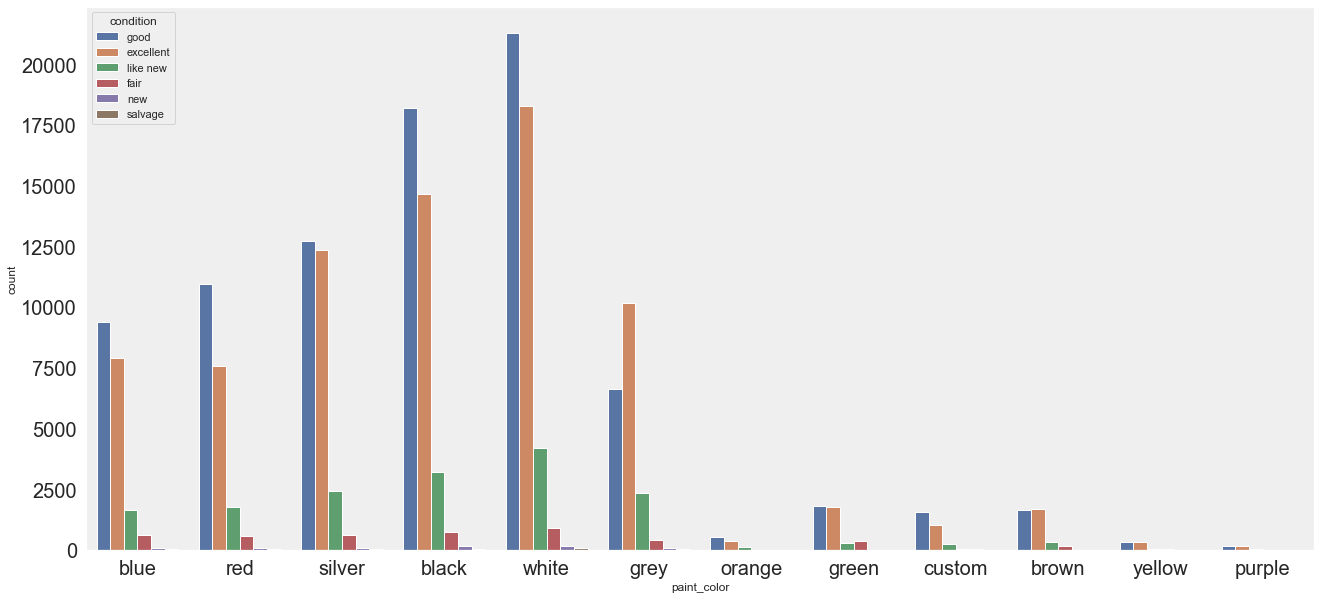

In [28]:
#compare condition by color
plt.figure(figsize=(22,10))
sns.countplot(data=df_year, x="paint_color", hue="condition")
plt.show()

importantly from above visualization it can be infered that grey colour's excellent condition is higher than good. At this point it is early to say but grey color cars would be good buys

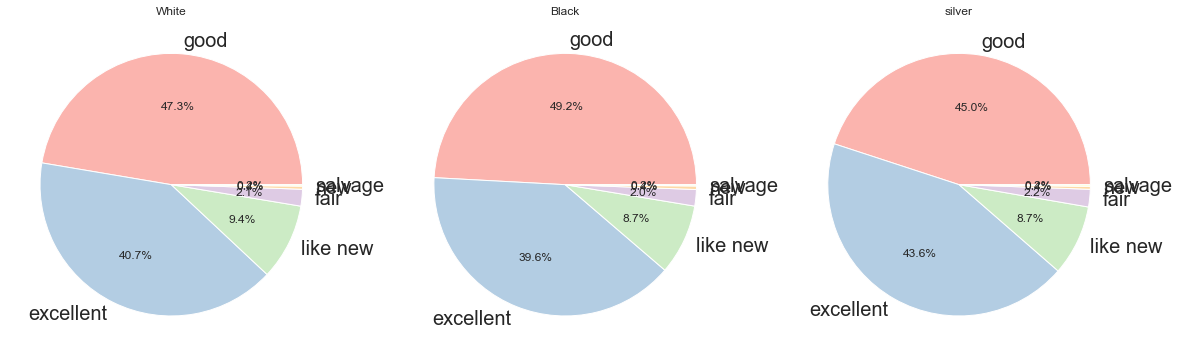

In [29]:
# more plotting for top three color
plt.figure(figsize=(20,15))

plt.subplot(131)
df_year['condition'][df_year["paint_color"]=="white"].value_counts().plot.pie(autopct='%.1f%%',title="White", colors=(cmap(np.arange(len(df)) % cmap.N)))
plt.axis('off')

plt.subplot(132)
df_year['condition'][df_year["paint_color"]=="black"].value_counts().plot.pie(autopct='%.1f%%',title="Black", colors=(cmap(np.arange(len(df)) % cmap.N)))
plt.axis('off')


plt.subplot(133)
df_year['condition'][df_year["paint_color"]=="silver"].value_counts().plot.pie(autopct='%.1f%%',title="silver", colors=(cmap(np.arange(len(df)) % cmap.N)))
plt.axis('off')

plt.show()

It can be observed tha white color the the most in market followed by black and silver



In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380831 entries, 0 to 458211
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        380831 non-null  object 
 1   price         380831 non-null  int64  
 2   year          380831 non-null  float64
 3   manufacturer  380831 non-null  object 
 4   condition     216577 non-null  object 
 5   cylinders     239424 non-null  object 
 6   fuel          378244 non-null  object 
 7   odometer      341536 non-null  float64
 8   title_status  378771 non-null  object 
 9   transmission  378859 non-null  object 
 10  drive         275730 non-null  object 
 11  size          109787 non-null  object 
 12  type          294397 non-null  object 
 13  paint_color   266724 non-null  object 
 14  description   380793 non-null  object 
 15  state         380831 non-null  object 
 16  lat           374472 non-null  float64
 17  long          374472 non-null  float64
 18  post

In [31]:
df_year["year"] = df_year["year"].astype(int) # converting year column from float to int

In [32]:
(df.isna().mean()*100.0).sort_values(ascending=False) #percentage of null values

size            71.171727
condition       43.130417
cylinders       37.131168
paint_color     29.962634
drive           27.597806
type            22.696157
odometer        10.318225
long             1.669770
lat              1.669770
fuel             0.679304
title_status     0.540922
transmission     0.517815
description      0.009978
manufacturer     0.000000
price            0.000000
year             0.000000
car_model        0.000000
posting_date     0.000000
state            0.000000
region           0.000000
dtype: float64

In [33]:
# droping size columns with 70% missing values (also assuming size to be perfect multicollinear with car_model)
df.drop(['size'], axis = 1, inplace = True)

In [34]:
# Information about the categorical variables (finding unique value for categorical features)
print(f'Unique paint values: {df["paint_color"].unique()}')
print(f'Unique conditions: {df["condition"].unique()}')
print(f'Unique types: {df["type"].unique()}')
print(f'Unique Fuel: {df["fuel"].unique()}')
print(f'Unique cylinders: {df["cylinders"].unique()}')
print(f'Unique Title status: {df["title_status"].unique()}')
print(f'Unique drive: {df["drive"].unique()}')
print(f'Unique Transmission: {df["transmission"].unique()}')

Unique paint values: [nan 'blue' 'red' 'silver' 'black' 'white' 'grey' 'orange' 'green'
 'custom' 'brown' 'yellow' 'purple']
Unique conditions: ['good' 'excellent' nan 'like new' 'fair' 'new' 'salvage']
Unique types: ['other' 'sedan' 'SUV' 'pickup' 'coupe' 'van' nan 'truck' 'mini-van'
 'wagon' 'convertible' 'hatchback' 'offroad' 'bus']
Unique Fuel: ['gas' 'diesel' 'other' 'hybrid' nan 'electric']
Unique cylinders: ['8 cylinders' '4 cylinders' '6 cylinders' nan '10 cylinders'
 '5 cylinders' '3 cylinders' 'other' '12 cylinders']
Unique Title status: ['clean' 'lien' 'missing' 'salvage' 'rebuilt' nan 'parts only']
Unique drive: ['rwd' 'fwd' nan '4wd']
Unique Transmission: ['other' 'automatic' 'manual' nan]


In [35]:
# removing cars with missing, salvage, rebuit and parts only, as these cars are not part of normal market and would be outliers which would create noise in our model
df = df[((df['title_status'] != 'missing') & (df['title_status'] != 'parts only') & (df['title_status'] != 'salvage') & (df['title_status'] != 'rebuilt'))]
df.shape

(369825, 19)

In [36]:
df['price'].describe()

count    3.698250e+05
mean     3.401904e+04
std      7.537795e+06
min      0.000000e+00
25%      5.400000e+03
50%      1.199000e+04
75%      2.199500e+04
max      3.615215e+09
Name: price, dtype: float64

In [37]:
#price is scattered and we want to remove outliers, hence removing price below $1,500 and above $150,000
df = df[((df['price'] < 150000) & (df['price'] > 1500))]
df.shape

(325958, 19)

In [38]:
(df.isna().mean()*100.0).sort_values(ascending=False)

condition       41.012953
cylinders       36.775290
paint_color     28.152400
drive           27.083857
type            22.262991
odometer         9.100866
long             0.708680
lat              0.708680
fuel             0.649777
title_status     0.439320
transmission     0.433798
description      0.011658
manufacturer     0.000000
price            0.000000
year             0.000000
car_model        0.000000
posting_date     0.000000
state            0.000000
region           0.000000
dtype: float64

In [39]:
#removing nans from description, title_status, transmission, fuel, manufacturer, at and long
df.dropna(subset = ['fuel', 'transmission', 'title_status', 'description', 'lat', 'long'], axis = 0, inplace = True)
df.shape

(319499, 19)

In [40]:
#replace missing color with 'unknown'

df['paint_color'].fillna('unknown', inplace = True)
df['paint_color'].unique()

array(['unknown', 'blue', 'red', 'silver', 'black', 'white', 'grey',
       'orange', 'green', 'custom', 'brown', 'yellow', 'purple'],
      dtype=object)

In [41]:
#replace missing number of cylinders with median of car model & delete 'other'

df = df[df['cylinders'] != 'other']
dftest = df.copy()
test = df[df['cylinders'].notnull()].copy()
test['cylinders'] = [int(cyl.split()[0]) for cyl in test['cylinders']]
med = test.groupby('car_model')['cylinders'].median()
merged = pd.merge(dftest, med, on = 'car_model', how = 'left')
merged['cylinders_y'].fillna(med.median(), inplace = True)
merged['cylinders_x'].fillna(merged['cylinders_y'], inplace = True)

li = []
for cyl in merged['cylinders_x']:
    if type(cyl) == str:
        li.append(cyl)
    else:
        li.append(str(int(cyl)) + " cylinders")

df['cylinders'] = li
df['cylinders'].unique()

array(['8 cylinders', '4 cylinders', '6 cylinders', '10 cylinders',
       '5 cylinders', '3 cylinders', '7 cylinders', '12 cylinders'],
      dtype=object)

In [42]:
#replacing model values
dftest = df.copy()
test = df[df['drive'].notnull()].copy()
mode = test.groupby('car_model')['drive'].agg(pd.Series.mode)
merged = pd.merge(dftest, mode, on = 'car_model', how = 'left')
merged['drive_x'].fillna(merged['drive_y'], inplace = True)
df['drive'] = merged['drive_x'].tolist()

In [ ]:
# Filling type with car_model matching values

dftest = df.copy()
test = df[df['type'].notnull()].copy()
mode = test.groupby('car_model')['type'].agg(pd.Series.mode)
for i in mode.index:
    if type(mode[i]) != str:
        mode[i] = mode[i][0]
merged = pd.merge(dftest, mode, on = 'car_model', how = 'left')
merged['type_x'].fillna(merged['type_y'], inplace = True)

df['type'] = merged['type_x'].tolist()
df['type'].unique()

In [ ]:
#Handling missing values in odometer column, as through odometer has ~9% missing values and odometer column at this point in time seems important feature for predicting sale price of car
# Using condition of car column to fill condition column nan values
df.loc[df["odometer"]>=2500000.0].shape
df.drop(df[df["odometer"]>=2500000.0].index,inplace=True) #dropping values above 250,000 
excellent_odo_mean = df[df['condition'] == 'excellent']['odometer'].mean() 
good_odo_mean = df[df['condition'] == 'good']['odometer'].mean()
like_new_odo_mean = df[df['condition'] == 'like new']['odometer'].mean()
salvage_odo_mean = df[df['condition'] == 'salvage']['odometer'].mean()
fair_odo_mean = df[df['condition'] == 'fair']['odometer'].mean()
df.loc[df.year>=2021, 'condition'] = df.loc[df.year>=2021, 'condition'].fillna('new')

In [ ]:
df.loc[df['odometer'] <= like_new_odo_mean, 'condition'] = df.loc[df['odometer'] <= like_new_odo_mean, 'condition'].fillna('like new')

df.loc[df['odometer'] >= fair_odo_mean, 'condition'] = df.loc[df['odometer'] >= fair_odo_mean, 'condition'].fillna('fair')

df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= excellent_odo_mean)), 'condition'] = df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= excellent_odo_mean)), 'condition'].fillna('excellent')

df.loc[((df['odometer'] > like_new_odo_mean) & 
       (df['odometer'] <= good_odo_mean)), 'condition'] = df.loc[((df['odometer'] > like_new_odo_mean) & 
       (df['odometer'] <= good_odo_mean)), 'condition'].fillna('good')

df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= fair_odo_mean)), 'condition'] = df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= fair_odo_mean)), 'condition'].fillna('salvage')

In [ ]:
# Odometer - fill with mean
df['odometer'] = df.groupby(['year'], sort=False)['odometer'].apply(lambda x: x.fillna(x.mean()))
df['odometer'] = df['odometer'].fillna(method="ffill")
df['odometer'].isnull().sum()

In [ ]:
#replace missing condition values with 'not specified' as we dont want to replace condition column at this time
df['condition'].fillna('not specified', inplace = True)
df['condition'].unique()

In [ ]:
# Cleaning cylinder column
df["cylinders"].str.split(' ')
df["cylinders"] = df["cylinders"].str.split(' ', expand=True).loc[:,0]
df["cylinders"] = df["cylinders"].str.replace(' cylinders', '')
df["cylinders"] = df['cylinders'].astype(int)

In [ ]:
# Seems all null NAN values have been handled

In [ ]:
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
categorical_columns = []
features = df.columns.values.tolist()
for col in features:
    if df[col].dtype in numerics: continue
    categorical_columns.append(col)

for cat_var in categorical_columns:
    print (cat_var, df[cat_var].nunique())

In [ ]:
print(df['car_model'].unique())
print(df['manufacturer'].unique())

In [ ]:
# we have already handled manufacturer column to car_model hence dont need manufacture column for further purpose and dropping manufacturer column
df.drop(['manufacturer'], axis = 1, inplace = True)

In [ ]:
#removing  region column (Region as it would add too much dimensionality and lat lon columns are already there)
df.drop([ 'region'], axis = 1, inplace = True)

In [ ]:
#converting date column to date time and engineering features from posting date
df['posting_date'] = pd.to_datetime(df['posting_date'], utc=True)
df['posting_weekday'] =df['posting_date'].dt.dayofweek 
df['posting_month'] =df['posting_date'].dt.month
df['posting_year'] =df['posting_date'].dt.year

In [ ]:
#droping date column
df.drop(['posting_date'], axis = 1, inplace = True)

In [ ]:
#State column have 51 states, grouping states as region_state 
 
northeast = [ 'nj', 'ct', 'ri', 'ma', 'me', 'nh', 'vt', 'ny', 'pa']
midwest = ['nd', 'sd', 'ne', 'ks', 'mn', 'ia', 'mo', 'wi', 'il', 'mi', 'in', 'oh' ]
south = ['dc', 'md', 'de', 'va', 'nc', 'sc', 'fl', 'ga', 'wv', 'ky', 'tn', 'al', 'ms', 'la', 'ar', 'ok', 'tx']
west = ['wa', 'or', 'ca', 'id', 'nv', 'ut', 'az', 'mt', 'wy','co', 'nm', 'ak', 'hi']

In [ ]:
stateregion = {state: 'northeast' for state in northeast}
stateregion.update({state: 'midwest' for state in midwest})
stateregion.update({state: 'south' for state in south})
stateregion.update({state: 'west' for state in west})
df['state'] = df['state'].map(stateregion)

In [ ]:
sns.distplot(df['price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')

# Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['price'], plot=plt)
plt.show();

The target feature - Price is right skewed. As linear models like normally distributed data , we will transform SalePrice and make it more normally distributed.

In [ ]:
sns.distplot(np.log1p(df['price']) , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(np.log1p(df['price']))
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('log(Price+1) distribution')

# Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(np.log1p(df['price']), plot=plt)
plt.show();

Correlation between numeric features

In [ ]:
pd.set_option('precision',2)
plt.figure(figsize=(10, 8))
sns.heatmap(df.drop(['price'],axis=1).corr(), square=True)
plt.suptitle("Pearson Correlation Heatmap")
plt.show();

In [ ]:
# Correlation between Price and the other numeric features
corr_with_price = df.corr()["price"].sort_values(ascending=False)
plt.figure(figsize=(14,6))
corr_with_price.drop("price").plot.bar()
plt.show();

Correlation of price with year is ~0.6 and cylinder is ~0.4
Lets look in more details

In [ ]:
sns.pairplot(df[['price', 'year', 'cylinders', 'posting_weekday', 'posting_month', 'long', 'odometer', 'posting_year']])
plt.show();

In [ ]:
#Encoding Catergorical columns
one_cols = [ 'condition',  'fuel',  'title_status',  'transmission',  'drive',  'type', 'paint_color', 'car_model',  'state']

In [ ]:
df= pd.get_dummies(df, columns = one_cols)

In [ ]:
df.describe()

In [ ]:
df.head()

In [ ]:
df.info()

#saving cleaned dataframe to csv file df 

df.to_csv('data/df_cleaned.csv')